In [1]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import random
import math
from collections import Counter
from statsmodels.distributions.empirical_distribution import ECDF

Мне выпал вариант II, то есть нужно было решать только пункт Б) в каждой из предложенных задач. * - на дополнительные льготы по экзамену доп. глав теории вероятностей. В некоторых номерах * решалась только на листочке

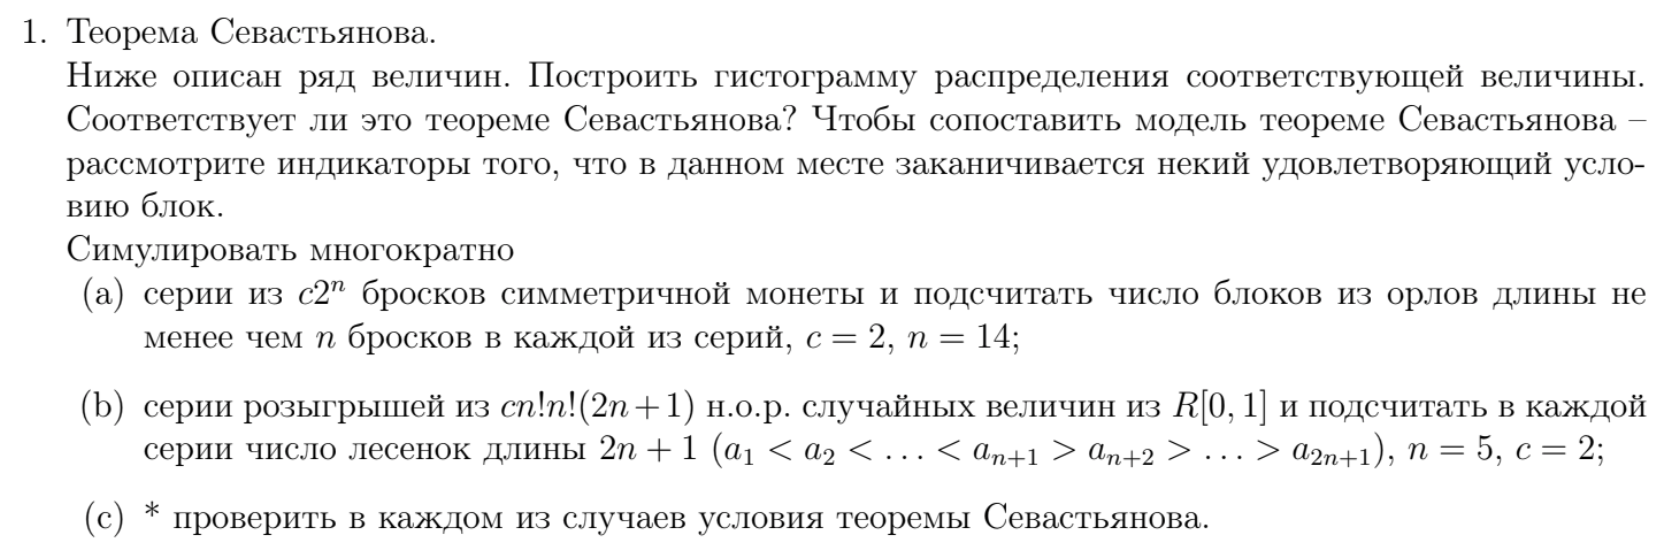

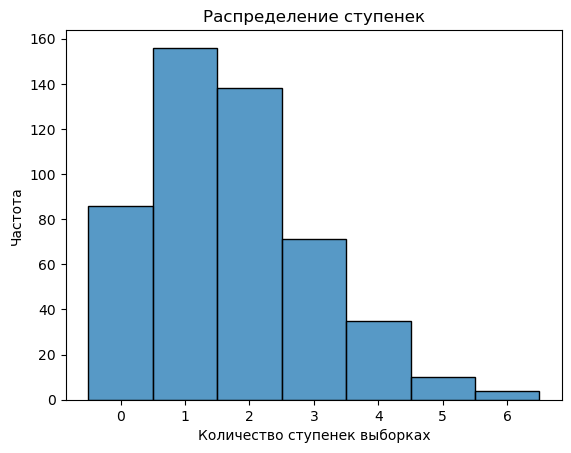

In [6]:
n = 5
c = 2
size = c * np.math.factorial(n) * np.math.factorial(n) * (2*n+1)

def increase_detector(array):
    key_idx = 0
    for i in range(n):
        if array[i] < array[i+1]:
            key_idx = i+1
        else:
            break
    return key_idx

def decrease_detector(array):
    key_idx = 0
    for i in range(n):
        if array[i] > array[i+1]:
            key_idx = i+1
        else:
            break
    return key_idx

def stairs_finder(key_idx):
    global counter
    while key_idx + 11 <= size: 
        observed_subarray = sample[key_idx: (key_idx+11)]
        inc_idx = increase_detector(observed_subarray[:n+1])
        if  0 < inc_idx < 5:
            key_idx += inc_idx
        elif inc_idx == 0:
            key_idx += 1
        else:
            dec_idx = decrease_detector(observed_subarray[n:])
            if dec_idx != 5:
                key_idx += inc_idx + dec_idx
            else:
                counter += 1
                key_idx += inc_idx + dec_idx
                
result = []
num_trials = 500
for _ in range(num_trials):
    counter = 0
    sample = sts.uniform.rvs(size=size)
    stairs_finder(0)
    result.append(counter)

p = sb.histplot(data = result, discrete = True, bins = 20)
p.set(xlabel ="Количество ступенек выборках", ylabel = "Частота", title ='Распределение ступенек');

<Axes: ylabel='Count'>

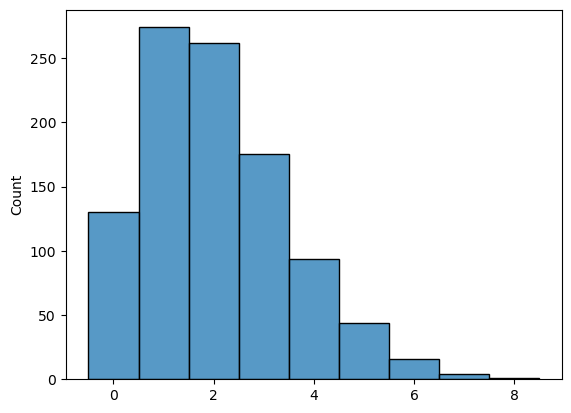

In [15]:
y = sts.poisson.rvs(2, size = 1000)
sb.histplot(y, discrete = True)

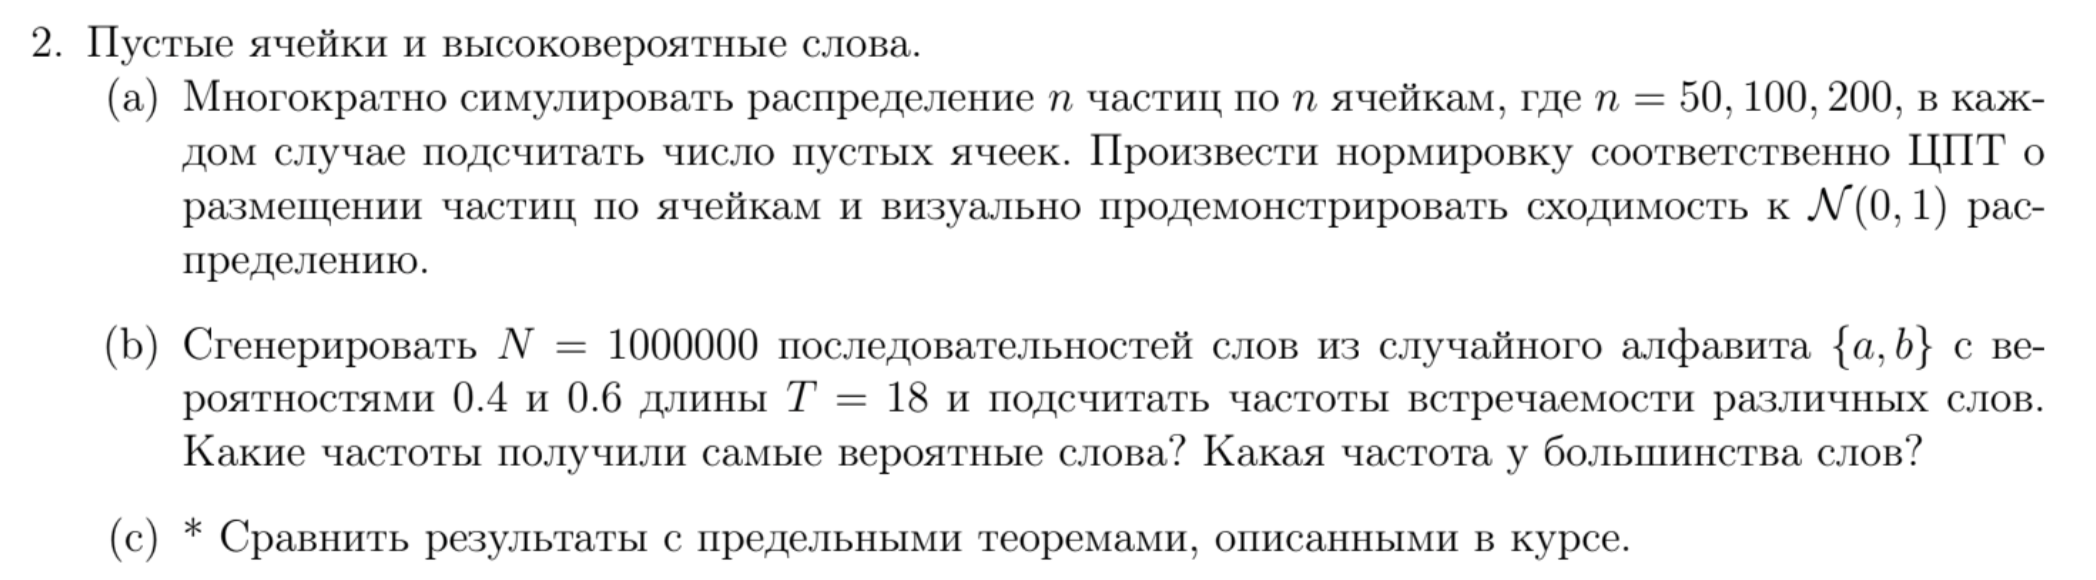

In [79]:
def generate_sequence(T):
    return ''.join(random.choices(['a', 'b'], weights=[0.4, 0.6], k=T))
N = 1_000_000
T = 18
sequences = [generate_sequence(T) for _ in range(N)]
word_counts = Counter(sequences)
print("Топ 10 самых распространенных слов:")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")
words_above_1 = sum(1 for count in word_counts.values() if count > 1)

print(f"\nЧисло слов с частотой > 1: {words_above_1}")
print(f"\nБольшинство слов {100*(1 - words_above_1/N)}% имеют частоту 1")

Топ 10 самых распространенных слов:
bbbbbbbbbbbbbbbbbb: 108
bbbbbbbbbbbabbbbbb: 86
bbbbbbbbbbbbbabbbb: 81
bbbbabbbbbbbbbbbbb: 78
bbabbbbbbbbbbbbbbb: 77
bbbbbbbbbbbbabbbbb: 76
bbbbbbbbbbbbbbbbab: 75
bbbbbbbabbbbbbbbbb: 75
babbbbbbbbbbbbbbbb: 70
bbbbbbbbbbbbbbbbba: 69

Число слов с частотой > 1: 175787

Большинство слов 82.4213% имеют частоту 1


In [84]:
for T in [14, 18, 22, 26, 30]:
    H = -(0.4 * np.log(0.4) + 0.6 * np.log(0.6))
    x = 0.5
    const = np.exp(-T*H - x*(T)**(2/3))
    sequences = [generate_sequence(T) for _ in range(N)]
    word_counts = Counter(sequences)
    words_above_test = sum(1 for count in word_counts.values() if count >= const*N)
    print(f"\nРезультат теста: {words_above_test/N}")
    
# Проверка предельной теоремы о стремлении вероятности событий из Z_T(x) -> 1 при T -> inf.


Результат теста: 0.016325

Результат теста: 0.223912

Результат теста: 0.793428

Результат теста: 0.979933

Результат теста: 0.998484


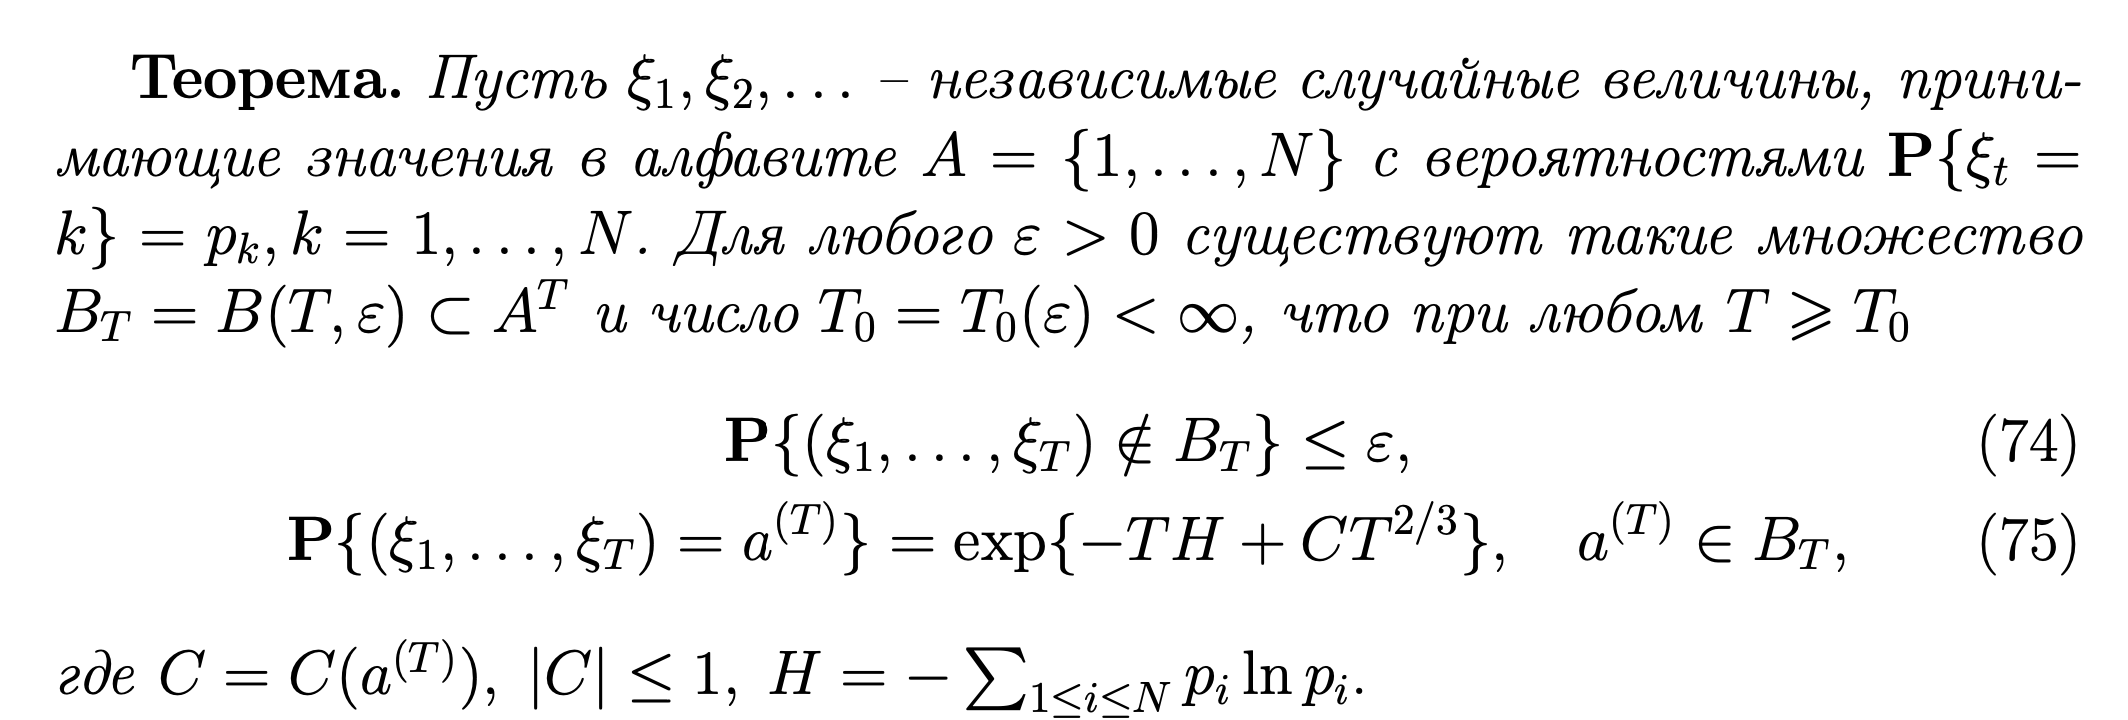

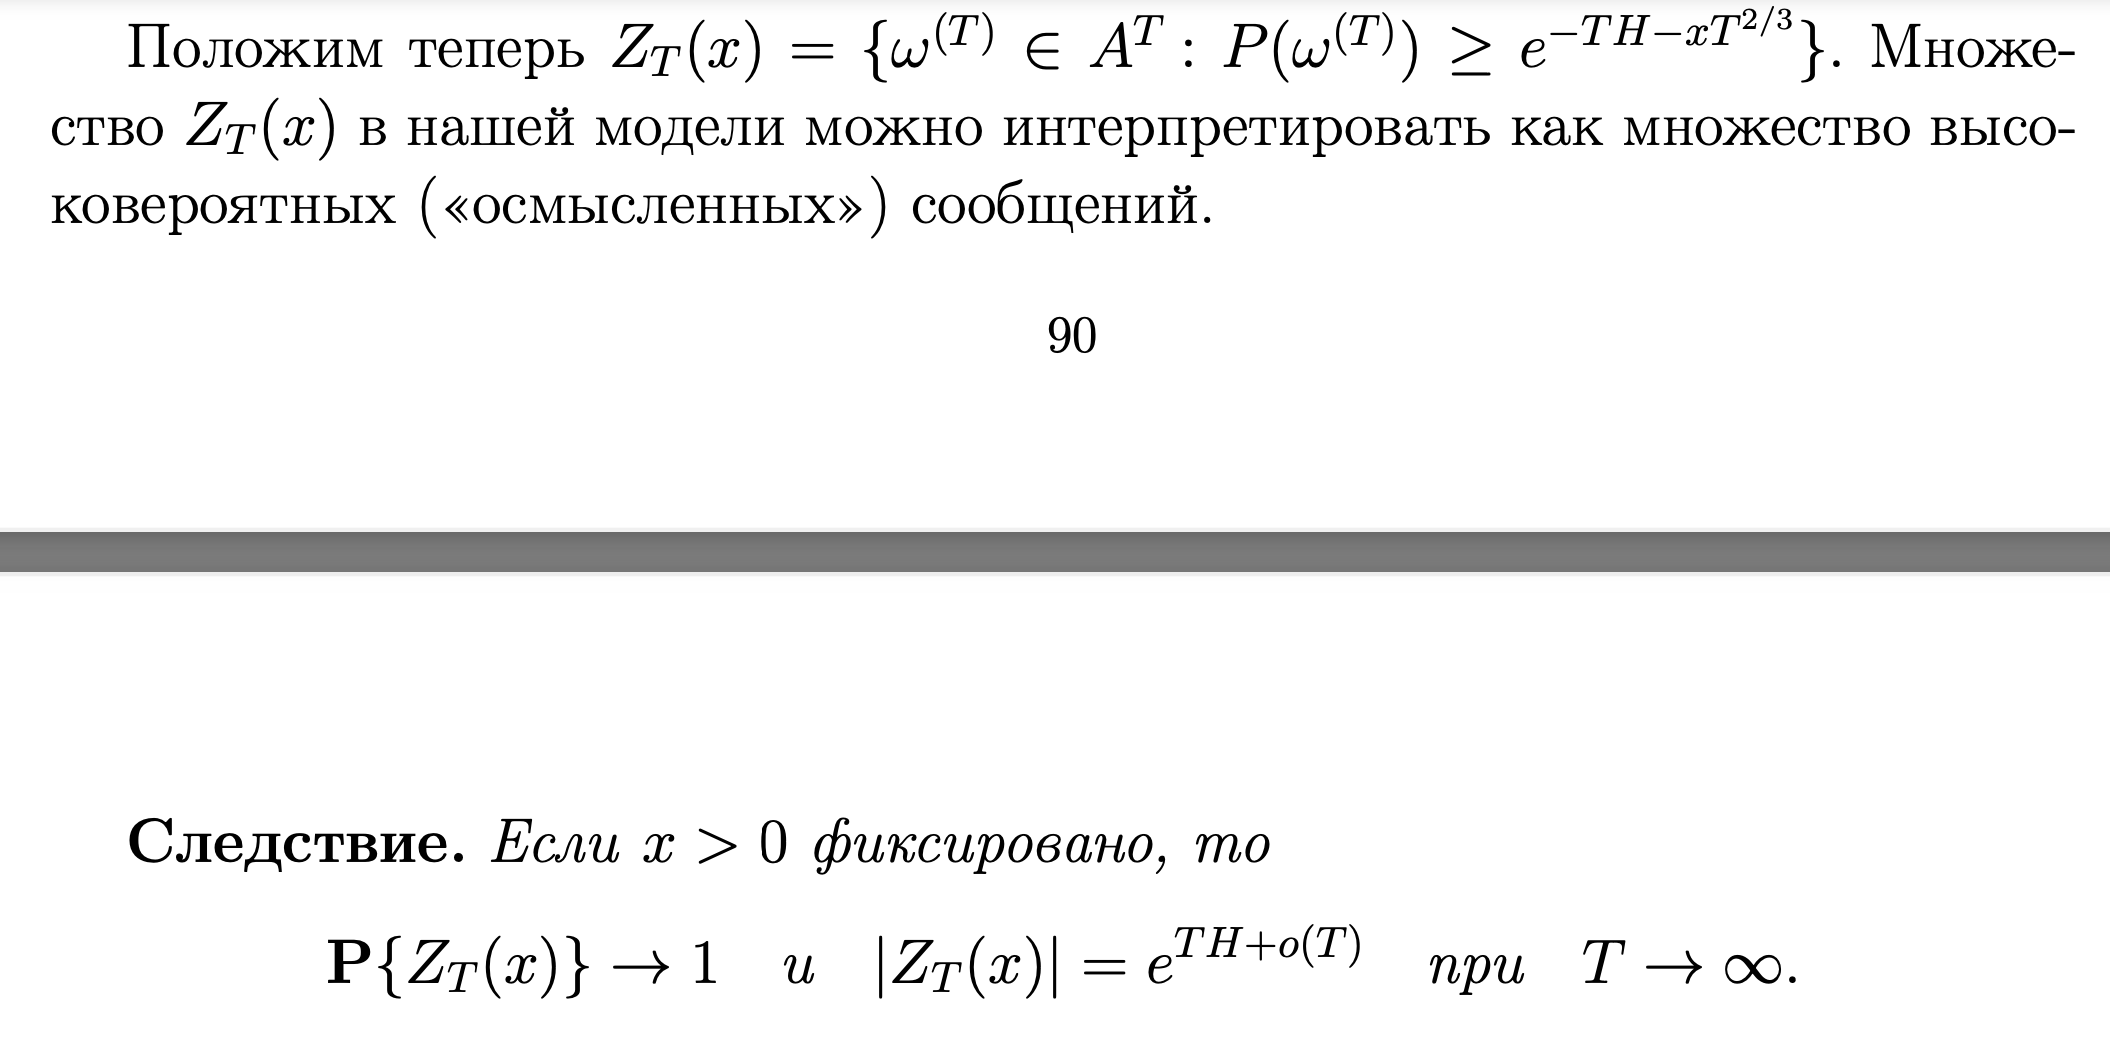

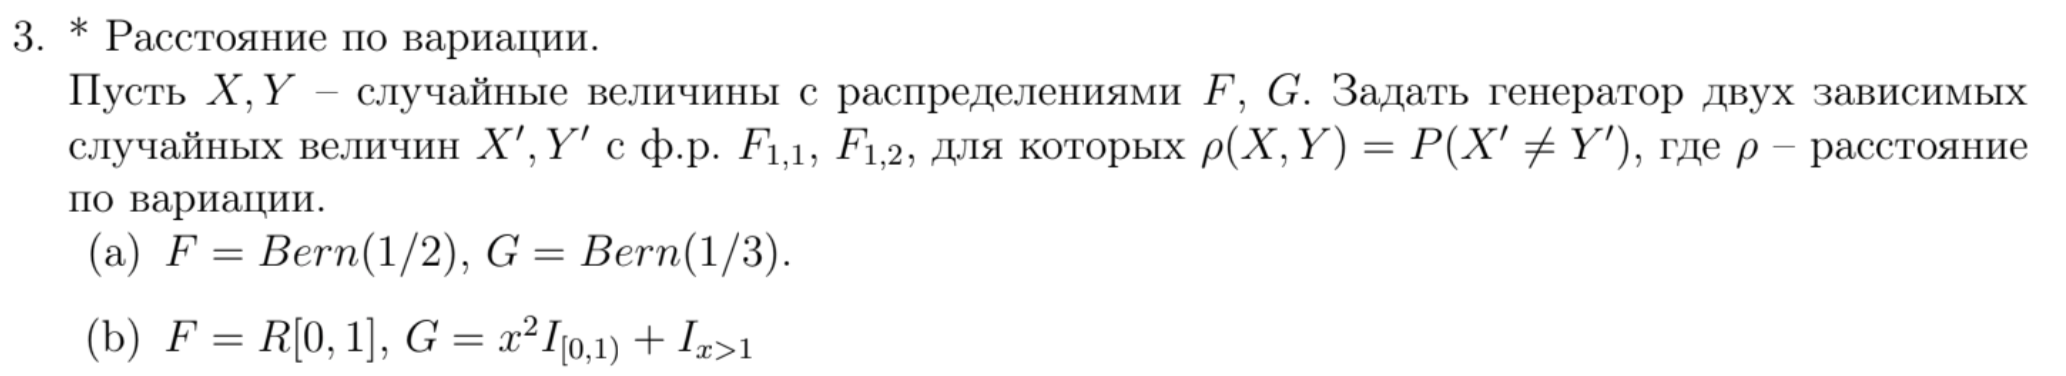

P(X' != Y') = 0.248


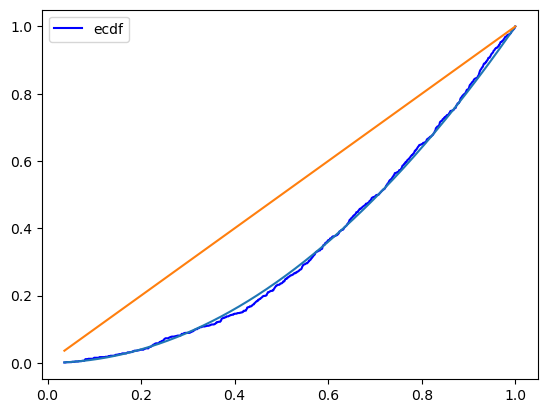

In [208]:
def generate_xy(size):
    bins = np.arange(0, size)/size
    def mu_XY(k, size):
        if k <= 0.5:
            res = 2*k/size
        else: 
            res = 1/size
        return res
    const = int(len(bins)/2)
    A_X = bins[:const]
    A_Y = bins[const:]
    def diff_X(k, size):
        if k > 0:
            return 1/size - mu_XY(k, size)
        else: return 0
    def diff_Y(k, size):
        return 2*k/size - mu_XY(k, size)
    X = sts.uniform.rvs(size = size)
    result_y = np.array([])
    result_x = np.array([])

    for x_test in X:
        if x_test <= 3/4:
            bins_new_X = np.array([mu_XY(k, size) for k in bins])
            for j in range(2,len(bins_new_X)):
                bins_new_X[j]+= bins_new_X[j-1]
            idx = np.digitize(x_test, bins_new_X)
            x, y = idx/size, idx/size
        else:
            bins_new_X = np.array([diff_X(x, size) for x in A_X])
            bins_new_Y = np.array([diff_Y(x, size) for x in A_Y])
            for j in range(2,len(bins_new_Y)):
                bins_new_X[j]+= bins_new_X[j-1]
                bins_new_Y[j]+= bins_new_Y[j-1]
            bins_new_X += 3/4
            bins_new_Y += 3/4
            idx_X = np.digitize(x_test, bins_new_X)
            idx_Y = np.digitize(x_test, bins_new_Y)
            x = idx_X/size
            y = idx_Y/size + 0.5
        result_y = np.append(result_y, y)
        result_x = np.append(result_x, x)
    return result_x, result_y
X, Y = generate_xy(1000)
proba = sum(X == Y)/1000
def find_ecdf(Y):
    ecdf = ECDF(Y)
    x = np.linspace(min(Y), max(Y), 1000)
    y = ecdf(x)
    plt.plot(x, y, label='ecdf', color = 'blue')
    parab = x**2
    plt.plot(x, parab)
    plt.plot(x, x)
    plt.legend()
find_ecdf(Y) ## поменять X на Y для проверки распределения Y.
print(f"P(X' != Y') = {1 - proba}")

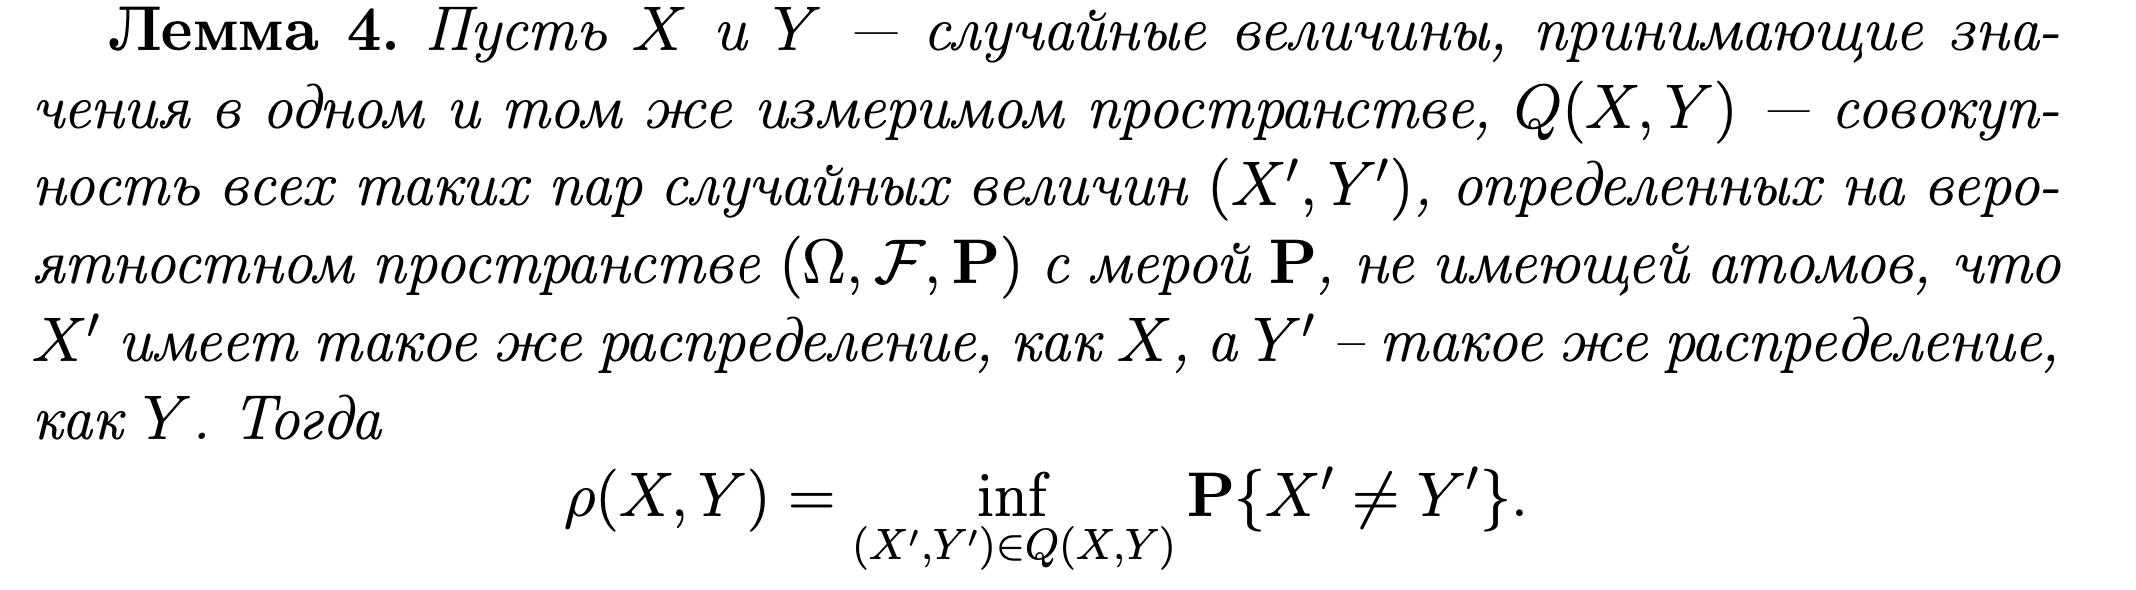

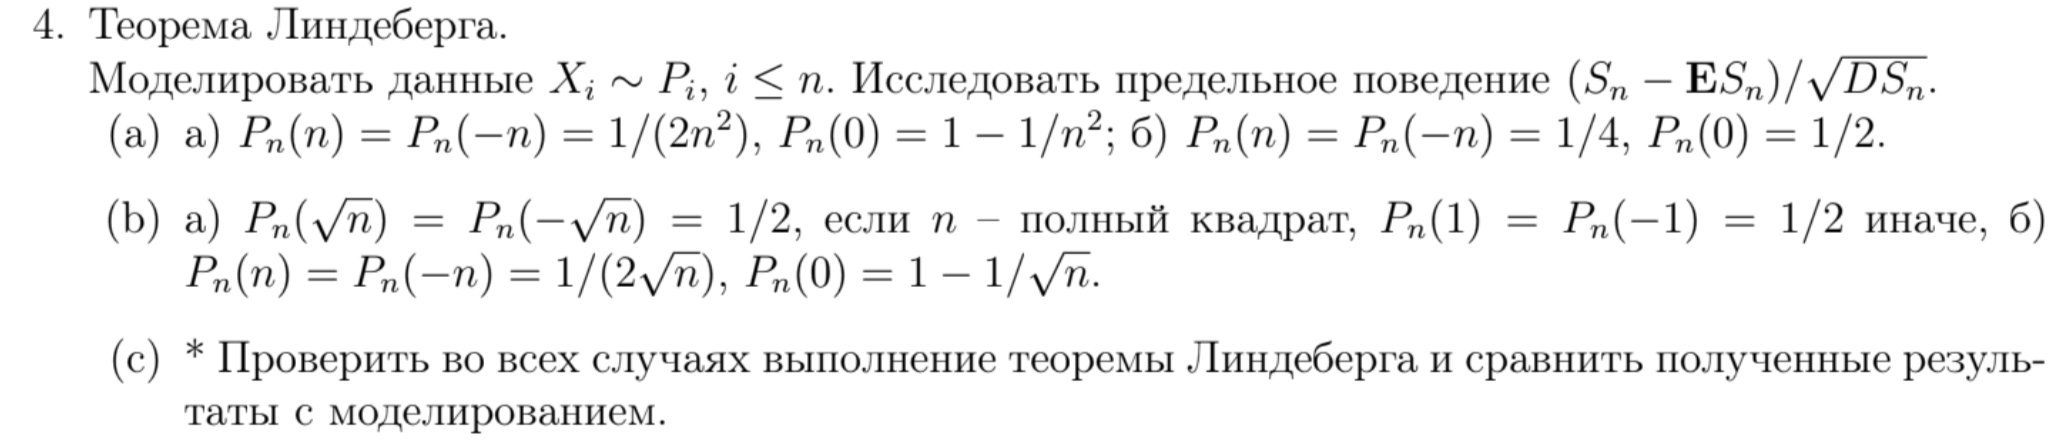

In [761]:
def is_square(i:int) -> bool:
    return i == math.isqrt(i) ** 2
def generate_a(n: int):
    if is_square(n):
        res = np.random.choice([np.sqrt(n), -np.sqrt(n)])
    else:
        res = np.random.choice([1, -1])
    return int(res)
def generate_b(n: int):
    res = np.random.choice([n,-n,0], p = [1/(2*np.sqrt(n)), 
                                                       1/(2*np.sqrt(n)), 
                                                      1 - 1/np.sqrt(n)])
    return int(res)

def indicator(eps, X, s_n):
    if np.abs(X) <= eps * s_n:
        return 0
    else: return 1

def get_exp(N, sn, eps, mode):
    if mode == 'a':
        if is_square(N):
            if np.sqrt(N) > eps * sn:
                return N
            else:
                return 0
        else:
            if 1 > eps * sn:
                return 1
            else: 
                return 0
    else:
        if N > eps * sn:
            return (2*N)**(3/2)
        else: return 0

def get_var_x(n, mode):
    if mode == 'a':
        if is_square(n):
            return n
        else:
            return 1
    else:
        return n

#### Пункт а)
def calculate_y(n, mode):
    nums = np.arange(1,n+1)
    if mode == 'a':
        gen_func = generate_a
    else:
        gen_func = generate_b
    
    eps = 0.5
    
    vect_var = np.vectorize(get_var_x)
    x_var = vect_var(nums, mode)

    s_n = np.sqrt(x_var.sum())
    vect_exp = np.vectorize(get_exp)
    exp_array = vect_exp(nums, s_n, eps, mode)
    test = 1/s_n**2 * exp_array.sum()

    vgen = np.vectorize(gen_func)
    data = vgen(nums)
    S_n = np.sum(data)
    result = S_n/s_n
    return result, test

<Axes: ylabel='Density'>

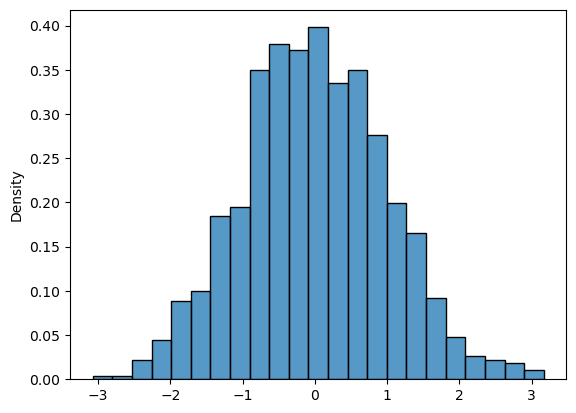

In [751]:
fig, ax = plt.subplots()
num_trials = 1000
result = [calculate_y(100, 'a')[0] for _ in range(num_trials)]
sb.histplot(result, stat = 'density')

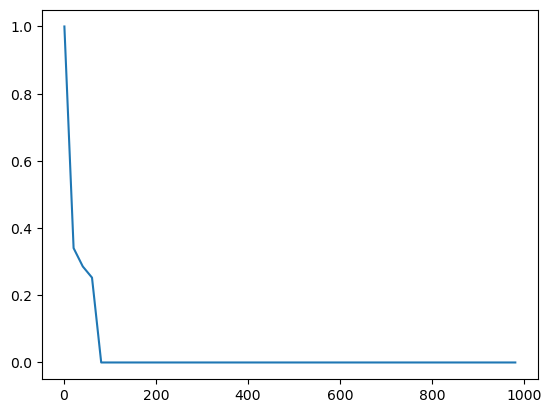

In [760]:
n = np.arange(1,1000, 20)
vect_func = np.vectorize(calculate_y)
results = vect_func(n, 'a')[1]
fig, ax = plt.subplots()
ax.plot(n, results)

<Axes: ylabel='Density'>

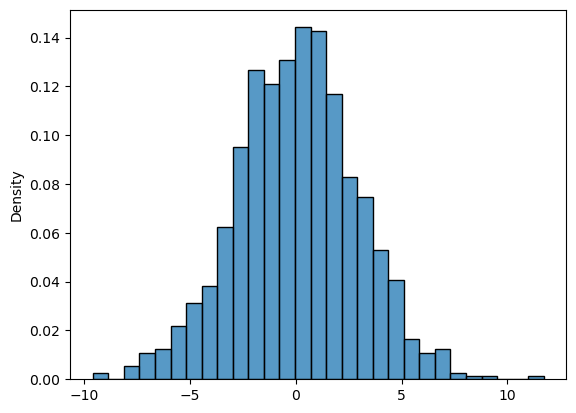

In [755]:
fig, ax = plt.subplots()
num_trials = 1000
result = [calculate_y(100, 'b')[0] for _ in range(num_trials)]
sb.histplot(result, stat = 'density')

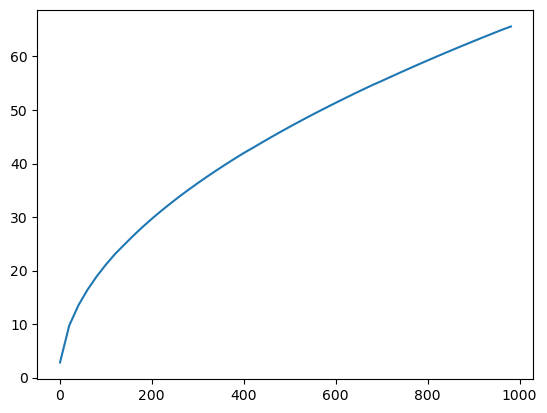

In [762]:
n = np.arange(1,1000, 20)
vect_func = np.vectorize(calculate_y)
results = vect_func(n, 'b')[1]
fig, ax = plt.subplots()
ax.plot(n, results)

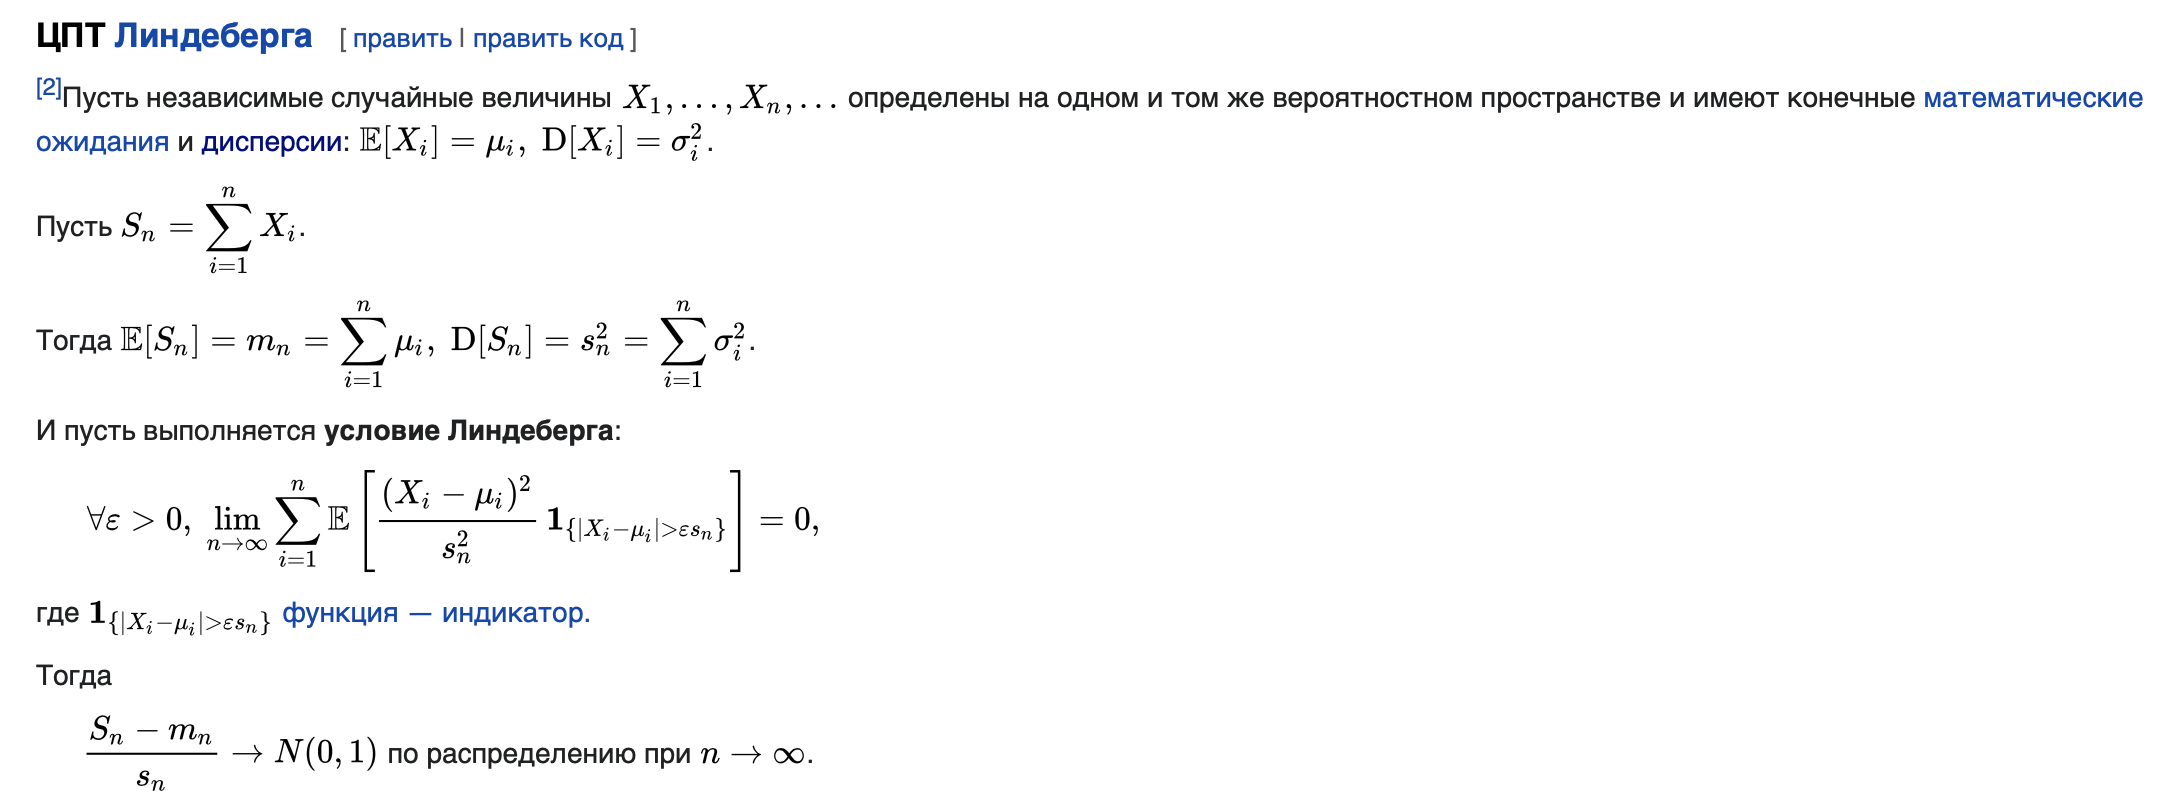

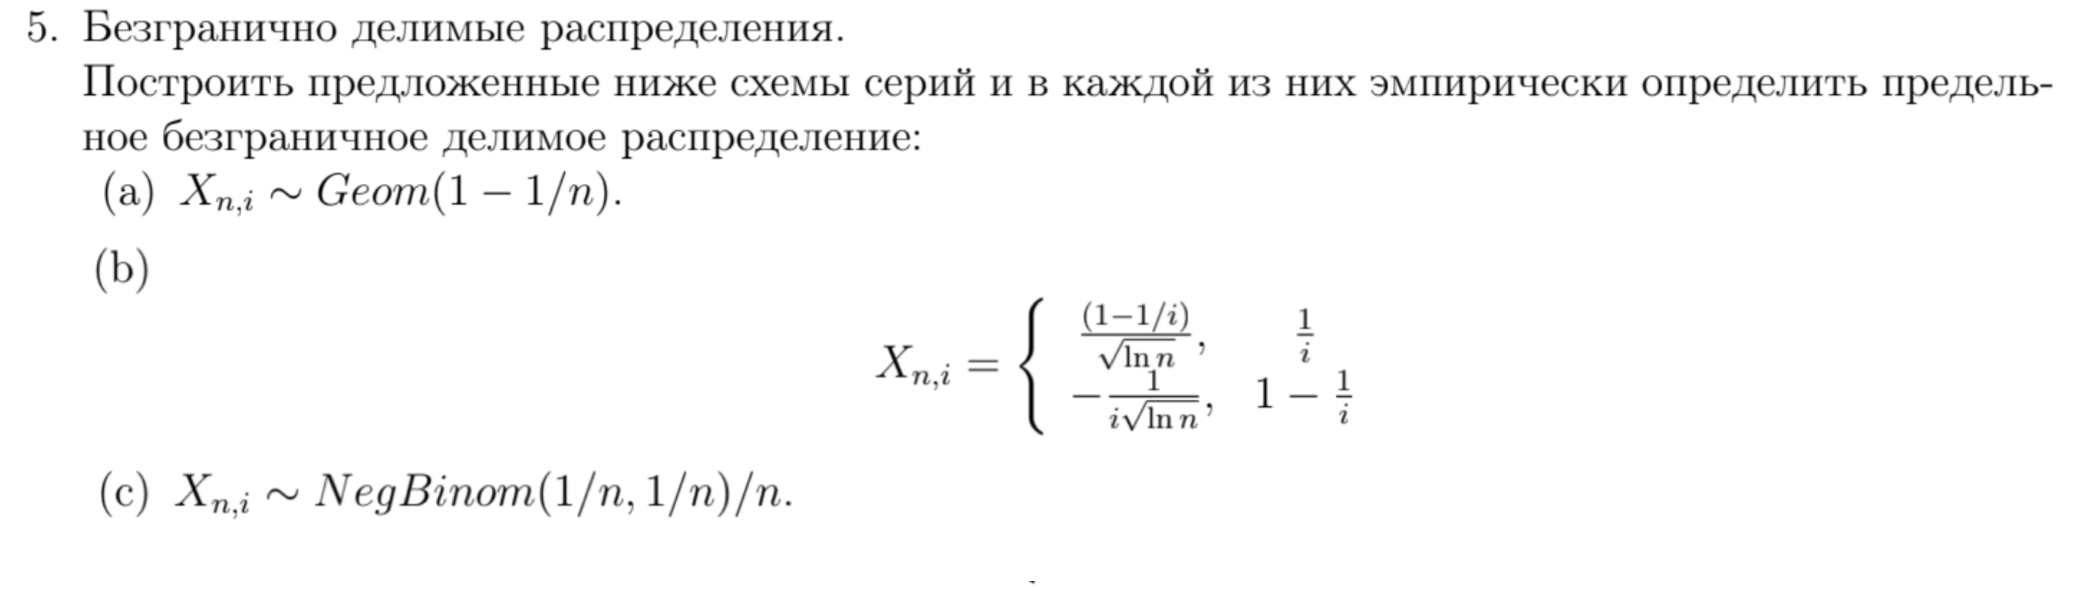

<Axes: ylabel='Density'>

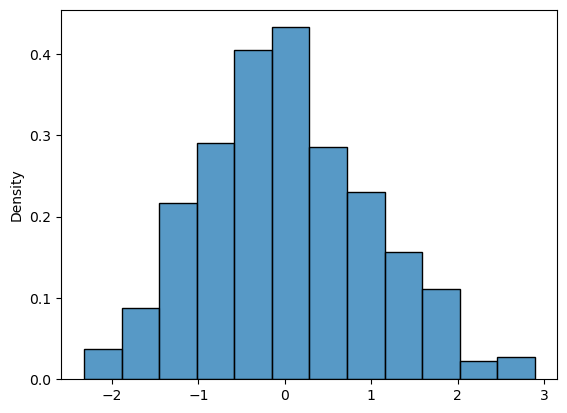

In [960]:
def generate_b(i, n):
    res = np.random.choice([(1 - 1/i)/np.sqrt(np.log(n)), 
                            -1/(i*np.sqrt(np.log(n)))], p = [1/i, 1 - 1/i])
    return res
def generate_a(i, n):
    res = sts.nbinom.rvs(1/n, 1/n)/n
    return res
def generate_x(n, mode):
    i = np.arange(1, n+1)
    if mode == 'b':
        generate_func = generate_x_i_n
    else:
        generate_func = generate_a
    res = (np.vectorize(generate_func)(i, n)).sum()
    return res
N = 500
num_trials = 500
results = [generate_x(N, 'b') for _ in range(num_trials)]
sb.histplot(results, stat = 'density', bins = 12)

<Axes: ylabel='Density'>

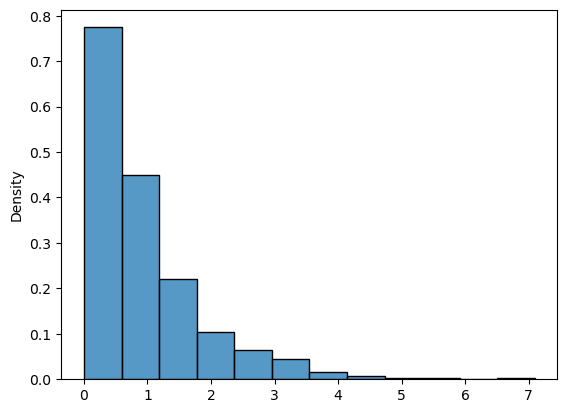

In [961]:
results_c = [generate_x(N, 'c') for _ in range(num_trials)]
sb.histplot(results_c, stat = 'density', bins = 12)